In [2]:
import drain.model
import epa.model.steps
#import epa_transform 
from drain import step

from epa.model.workflow import *
from epa.model.transform import *
original_data = violation_state_original_data() + violation_state_manifest_added() + violation_state_br_added() + violation_state_manifest_br_added()

epa.model.steps = reload(epa.model.steps)
steps = drain.step.load(original_data)

step.OUTPUTDIR = '/mnt/data/nysdec/epa-ny/drain/'

In [3]:
step.load(original_data)

[FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
        handlers={}, icis={}, impute=True, include=set([]),
        inve...', region=None,
        rmp={}, train_query='aux.evaluation_state', train_years=2,
        year=2012)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
        handlers={}, icis={}, impute=True, include=set([]),
        inve...', region=None,
        rmp={}, train_query='aux.evaluation_state', train_years=2,
        year=2013)],
       prefit=False, return_estimator=False,


In [25]:
len(original_data)

60

In [11]:
original_data[0]

FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
     criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
       handlers={}, icis={}, impute=True, include=set([]),
       inve...', region=None,
       rmp={}, train_query='aux.evaluation_state', train_years=2,
       year=2012)],
      prefit=False, return_estimator=False,
      return_feature_importances=True, return_predictions=True)

In [200]:
original_data[4]

FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
     criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
       handlers={}, icis={}, impute=True, include=set([]),
       inve...', region=None,
       rmp={}, train_query='aux.evaluation_state', train_years=3,
       year=2012)],
      prefit=False, return_estimator=False,
      return_feature_importances=True, return_predictions=True)

In [12]:
y = original_data[0]

In [13]:
y = original_data[0].get_result()['y']

In [14]:
y.head()

,,true,score,active_today,br,enforcement,enforcement_epa,enforcement_state,evaluation,evaluation_epa,evaluation_state,...,region,state,violation,violation_epa,violation_state,violation_types,violation_types_epa,violation_types_state,last_investigation_days,last_investigation_date
rcra_id,date,,,,,,,,,,,,,,,,,,,,,
NYR000195487,2012-01-01,True,0.449569,False,False,True,None,True,True,False,True,...,2.0,NY,True,None,True,"[273.B, 261.A, 262.A]",[],"[273.B, 261.A, 262.A]",NaN,NaT
NYD002065860,2012-01-01,None,0.310000,True,False,None,None,None,False,False,False,...,2.0,NY,None,None,None,[],[],[],NaN,NaT
NYD080525231,2012-01-01,None,0.534596,True,False,None,None,None,False,False,False,...,2.0,NY,None,None,None,[],[],[],NaN,NaT
NYD088419890,2012-01-01,None,0.184000,True,False,None,None,None,False,False,False,...,2.0,NY,None,None,None,[],[],[],626.0,2010-04-15
NYD981081375,2012-01-01,None,0.428000,True,False,None,None,None,False,False,False,...,2.0,NY,None,None,None,[],[],[],2347.0,2005-07-29


In [15]:
y[y.true.notnull()].sort_values('score', ascending=False)

,,true,score,active_today,br,enforcement,enforcement_epa,enforcement_state,evaluation,evaluation_epa,evaluation_state,...,region,state,violation,violation_epa,violation_state,violation_types,violation_types_epa,violation_types_state,last_investigation_days,last_investigation_date
rcra_id,date,,,,,,,,,,,,,,,,,,,,,
NYR000204370,2012-01-01,True,1.000000,True,False,True,None,True,True,False,True,...,2.0,NY,True,None,True,[273.C],[],[273.C],NaN,NaT
NYR000204289,2012-01-01,True,1.000000,True,False,True,None,True,True,False,True,...,2.0,NY,True,None,True,"[273.B, 261.A]",[],"[273.B, 261.A]",NaN,NaT
NYR000193870,2012-01-01,False,0.865269,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],NaN,NaT
NYR000185652,2012-01-01,False,0.848000,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],NaN,NaT
NYR000067223,2012-01-01,False,0.830512,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],NaN,NaT
NYR000112953,2012-01-01,True,0.818000,True,False,True,None,True,True,False,True,...,2.0,NY,True,None,True,"[262.C, 265.C, 265.I]",[],"[262.C, 265.C, 265.I]",1300.0,2008-06-10
NY0000187260,2012-01-01,False,0.810000,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],683.0,2010-02-17
NYR000166827,2012-01-01,False,0.808000,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],NaN,NaT
NYD982274524,2012-01-01,False,0.804512,True,False,False,None,False,True,False,True,...,2.0,NY,False,None,False,[],[],[],NaN,NaT


In [15]:
#from drain import step

In [16]:
steps[0].inputs[1]

EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
       handlers={}, icis={}, impute=True, include=set([]),
       investigations={}, investigations_expand_counts=False, month=1,
       normalize=True, outcome_expr='aux.violation_state', region=None,
       rmp={}, train_query='aux.evaluation_state', train_years=2,
       year=2012)

In [17]:
steps[1]

FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
     criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
       handlers={}, icis={}, impute=True, include=set([]),
       inve...', region=None,
       rmp={}, train_query='aux.evaluation_state', train_years=2,
       year=2013)],
      prefit=False, return_estimator=False,
      return_feature_importances=True, return_predictions=True)

In [38]:
epa_transform = steps[0].inputs[1]

In [40]:
epa_transform

EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
       handlers={}, icis={}, impute=True, include=set([]),
       investigations={}, investigations_expand_counts=False, month=1,
       normalize=True, outcome_expr='aux.violation_state', region=None,
       rmp={}, train_query='aux.evaluation_state', train_years=2,
       year=2012)

In [49]:
#X = epa_transform.get_result()['X']

In [18]:
steps[0].inputs[1].execute(load_targets=True)

{'X':                           br  handler_non_notifier  \
 rcra_id      date                                    
 NYN008022824 2010-01-01  0.0              0.000039   
 NYN008022857 2010-01-01  0.0              0.000039   
 NYN008023855 2011-01-01  0.0              0.000039   
 NYR000195487 2012-01-01  0.0              0.000039   
 NYD002065860 2012-01-01  0.0              0.000039   
 NYD080525231 2012-01-01  0.0              0.000039   
 NYD088419890 2010-01-01  0.0              0.000039   
              2012-01-01  0.0              0.000039   
 NYD981081375 2012-01-01  0.0              0.000039   
 NYD981494933 2012-01-01  0.0              0.000039   
 NYD982272023 2012-01-01  0.0              0.000039   
 NYD982275976 2012-01-01  0.0              0.000039   
 NYD986930758 2010-01-01  0.0              0.000039   
 NYD986971919 2012-01-01  0.0              0.000039   
 NYD987036068 2012-01-01  0.0              0.000039   
 NYP004164372 2012-01-01  0.0              0.000039   
 NYP0

In [19]:
from drain import metrics

In [20]:
%matplotlib inline

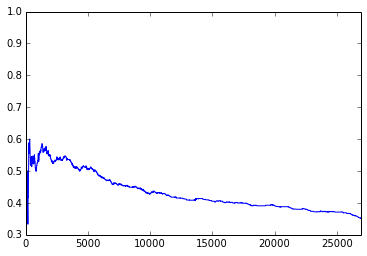

In [21]:

metrics.precision_series(y['true'],y['score']).plot()

In [22]:
from drain import explore

In [88]:
['manifest_.*' in x for x in df['exclude']]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [95]:
df.ix['manifest_.*' in x for x in df['exclude']]

SyntaxError: invalid syntax (<ipython-input-95-f098a6986123>, line 1)

In [93]:
df.query('['manifest_.*' in x for x in df['exclude']]')

SyntaxError: invalid syntax (<ipython-input-93-b3b7102a485b>, line 1)

In [98]:
df[['br_.*' in x for x in df['exclude']]]

,exclude,train_years,year,step
0,"{manifest_.*, br_.*}",2,2012,FitPredict(inputs=[Construct(__class_name__='s...
1,"{manifest_.*, br_.*}",2,2013,FitPredict(inputs=[Construct(__class_name__='s...
2,"{manifest_.*, br_.*}",2,2014,FitPredict(inputs=[Construct(__class_name__='s...
3,"{manifest_.*, br_.*}",2,2015,FitPredict(inputs=[Construct(__class_name__='s...
4,"{manifest_.*, br_.*}",3,2012,FitPredict(inputs=[Construct(__class_name__='s...
5,"{manifest_.*, br_.*}",3,2013,FitPredict(inputs=[Construct(__class_name__='s...
6,"{manifest_.*, br_.*}",3,2014,FitPredict(inputs=[Construct(__class_name__='s...
7,"{manifest_.*, br_.*}",3,2015,FitPredict(inputs=[Construct(__class_name__='s...
8,"{manifest_.*, br_.*}",4,2012,FitPredict(inputs=[Construct(__class_name__='s...
9,"{manifest_.*, br_.*}",4,2013,FitPredict(inputs=[Construct(__class_name__='s...


In [57]:
df.tail()

,exclude,train_years,year,step
55,{},4,2014,FitPredict(inputs=[Construct(__class_name__='s...
56,{},4,2015,FitPredict(inputs=[Construct(__class_name__='s...
57,{},5,2013,FitPredict(inputs=[Construct(__class_name__='s...
58,{},5,2014,FitPredict(inputs=[Construct(__class_name__='s...
59,{},5,2015,FitPredict(inputs=[Construct(__class_name__='s...


In [27]:
df.dtypes

exclude        object
train_years     int64
year            int64
step           object
dtype: object

In [60]:
explore.apply(df, model.count)

exclude                                 train_years  year
!!set {br_.*: null, manifest_.*: null}  2            2012    880
                                                     2013    768
                                                     2014    818
                                                     2015    809
                                        3            2012    880
                                                     2013    768
                                                     2014    818
                                                     2015    809
                                        4            2012    880
                                                     2013    768
                                                     2014    818
                                                     2015    809
                                        5            2012    880
                                                     2013    768
                                

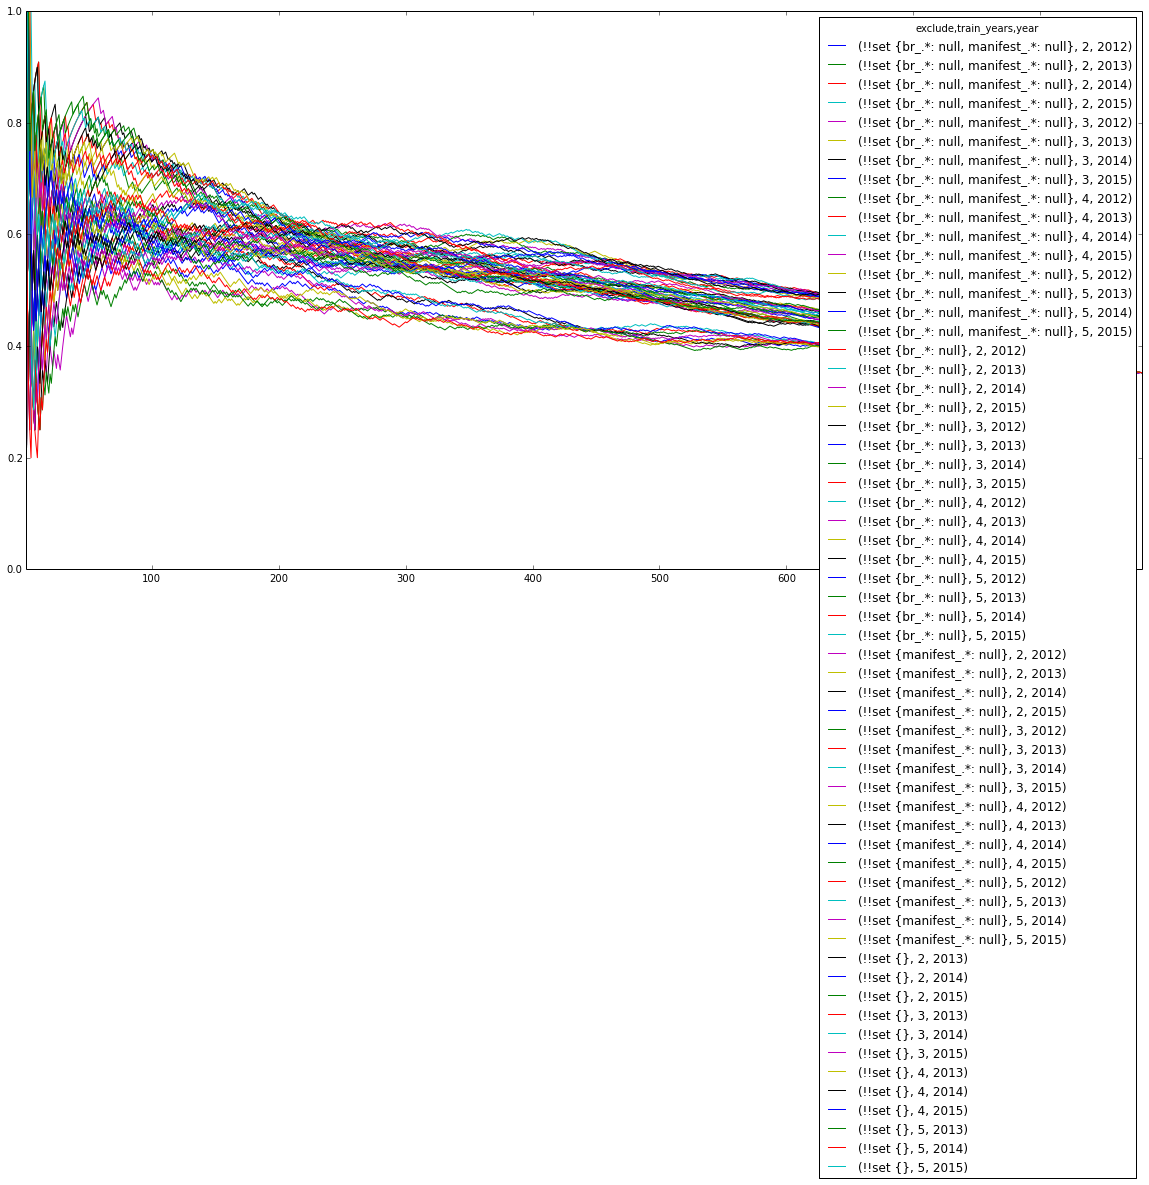

In [65]:
explore.apply(df.query('year < 2016'), model.precision_series, query="state=='NY'", dropna=True).plot(figsize = (20,10))

In [63]:
sub1 = df[df.exclude=='{}']

In [64]:
sub1.head()

,exclude,train_years,year,step


In [54]:
df.shape

(60, 4)

In [58]:
df.head()

,exclude,train_years,year,step
0,"{manifest_.*, br_.*}",2,2012,FitPredict(inputs=[Construct(__class_name__='s...
1,"{manifest_.*, br_.*}",2,2013,FitPredict(inputs=[Construct(__class_name__='s...
2,"{manifest_.*, br_.*}",2,2014,FitPredict(inputs=[Construct(__class_name__='s...
3,"{manifest_.*, br_.*}",2,2015,FitPredict(inputs=[Construct(__class_name__='s...
4,"{manifest_.*, br_.*}",3,2012,FitPredict(inputs=[Construct(__class_name__='s...


In [68]:
type(df.exclude[0])

set

In [141]:
subboth = df[['manifest_.*' in x for x in df['exclude']]]

KeyError: 32

In [140]:
subboth

,exclude,train_years,year,step
0,"{manifest_.*, br_.*}",2,2012,FitPredict(inputs=[Construct(__class_name__='s...
1,"{manifest_.*, br_.*}",2,2013,FitPredict(inputs=[Construct(__class_name__='s...
2,"{manifest_.*, br_.*}",2,2014,FitPredict(inputs=[Construct(__class_name__='s...
3,"{manifest_.*, br_.*}",2,2015,FitPredict(inputs=[Construct(__class_name__='s...
4,"{manifest_.*, br_.*}",3,2012,FitPredict(inputs=[Construct(__class_name__='s...
5,"{manifest_.*, br_.*}",3,2013,FitPredict(inputs=[Construct(__class_name__='s...
6,"{manifest_.*, br_.*}",3,2014,FitPredict(inputs=[Construct(__class_name__='s...
7,"{manifest_.*, br_.*}",3,2015,FitPredict(inputs=[Construct(__class_name__='s...
8,"{manifest_.*, br_.*}",4,2012,FitPredict(inputs=[Construct(__class_name__='s...
9,"{manifest_.*, br_.*}",4,2013,FitPredict(inputs=[Construct(__class_name__='s...


In [157]:
df[['manifest_.*' in x for x in df['exclude']]]

,exclude,train_years,year,step
0,"{manifest_.*, br_.*}",2,2012,FitPredict(inputs=[Construct(__class_name__='s...
1,"{manifest_.*, br_.*}",2,2013,FitPredict(inputs=[Construct(__class_name__='s...
2,"{manifest_.*, br_.*}",2,2014,FitPredict(inputs=[Construct(__class_name__='s...
3,"{manifest_.*, br_.*}",2,2015,FitPredict(inputs=[Construct(__class_name__='s...
4,"{manifest_.*, br_.*}",3,2012,FitPredict(inputs=[Construct(__class_name__='s...
5,"{manifest_.*, br_.*}",3,2013,FitPredict(inputs=[Construct(__class_name__='s...
6,"{manifest_.*, br_.*}",3,2014,FitPredict(inputs=[Construct(__class_name__='s...
7,"{manifest_.*, br_.*}",3,2015,FitPredict(inputs=[Construct(__class_name__='s...
8,"{manifest_.*, br_.*}",4,2012,FitPredict(inputs=[Construct(__class_name__='s...
9,"{manifest_.*, br_.*}",4,2013,FitPredict(inputs=[Construct(__class_name__='s...


In [143]:
subman

,exclude,train_years,year,step
0,"{manifest_.*, br_.*}",2,2012,FitPredict(inputs=[Construct(__class_name__='s...
1,"{manifest_.*, br_.*}",2,2013,FitPredict(inputs=[Construct(__class_name__='s...
2,"{manifest_.*, br_.*}",2,2014,FitPredict(inputs=[Construct(__class_name__='s...
3,"{manifest_.*, br_.*}",2,2015,FitPredict(inputs=[Construct(__class_name__='s...
4,"{manifest_.*, br_.*}",3,2012,FitPredict(inputs=[Construct(__class_name__='s...
5,"{manifest_.*, br_.*}",3,2013,FitPredict(inputs=[Construct(__class_name__='s...
6,"{manifest_.*, br_.*}",3,2014,FitPredict(inputs=[Construct(__class_name__='s...
7,"{manifest_.*, br_.*}",3,2015,FitPredict(inputs=[Construct(__class_name__='s...
8,"{manifest_.*, br_.*}",4,2012,FitPredict(inputs=[Construct(__class_name__='s...
9,"{manifest_.*, br_.*}",4,2013,FitPredict(inputs=[Construct(__class_name__='s...


In [173]:
subbr= df[['br_.*' in x for x in df['exclude'] and 'manifest_.*' in y for y in df['exclude']]]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [116]:
subbr

,exclude,train_years,year,step
0,"{manifest_.*, br_.*}",2,2012,FitPredict(inputs=[Construct(__class_name__='s...
1,"{manifest_.*, br_.*}",2,2013,FitPredict(inputs=[Construct(__class_name__='s...
2,"{manifest_.*, br_.*}",2,2014,FitPredict(inputs=[Construct(__class_name__='s...
3,"{manifest_.*, br_.*}",2,2015,FitPredict(inputs=[Construct(__class_name__='s...
4,"{manifest_.*, br_.*}",3,2012,FitPredict(inputs=[Construct(__class_name__='s...
5,"{manifest_.*, br_.*}",3,2013,FitPredict(inputs=[Construct(__class_name__='s...
6,"{manifest_.*, br_.*}",3,2014,FitPredict(inputs=[Construct(__class_name__='s...
7,"{manifest_.*, br_.*}",3,2015,FitPredict(inputs=[Construct(__class_name__='s...
8,"{manifest_.*, br_.*}",4,2012,FitPredict(inputs=[Construct(__class_name__='s...
9,"{manifest_.*, br_.*}",4,2013,FitPredict(inputs=[Construct(__class_name__='s...


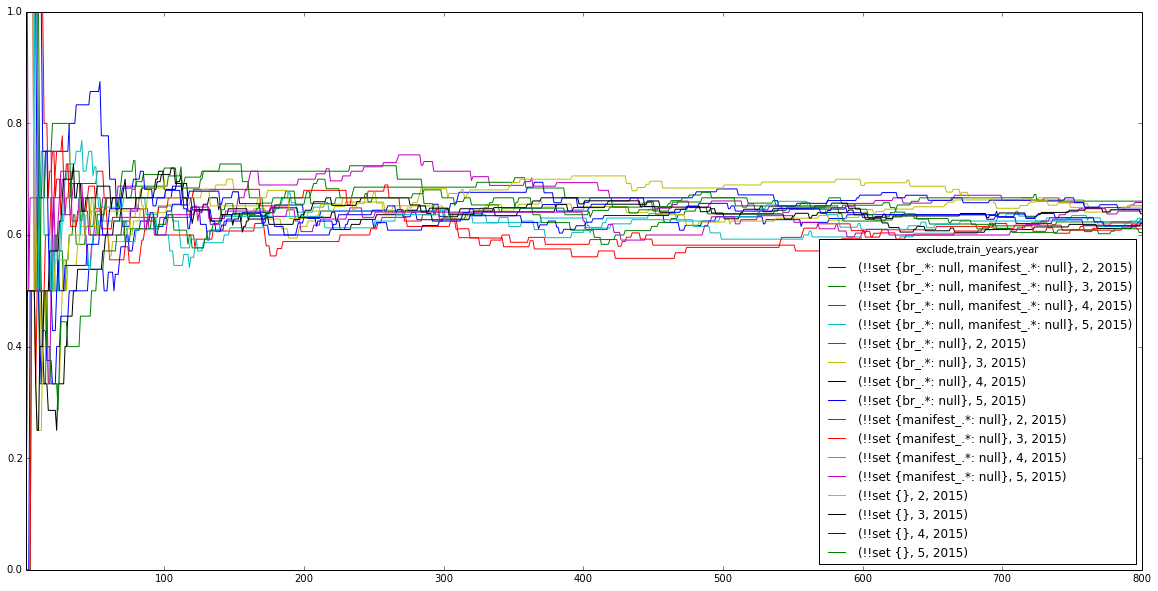

In [186]:
explore.apply(df.query('year == 2015'), model.precision_series, query="state=='NY'", k=800,dropna=False).plot(figsize = (20,10))

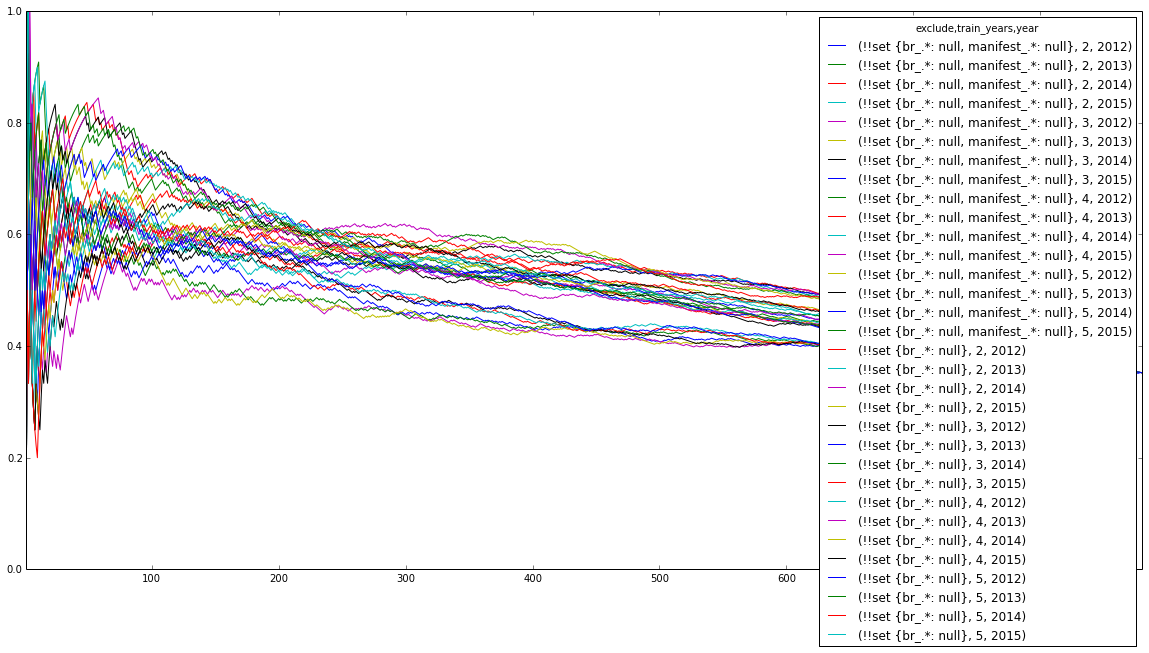

In [107]:
#explore.apply(df.query, model.precision_series, query="state=='NY'", dropna=True).plot(figsize = (20,10))

explore.apply(subbr, model.precision_series, query="state=='NY'", dropna=True).plot(figsize = (20,10))

#explore.apply(df.query('year < 2016'), model.precision_series, query="state=='NY'", dropna=True).plot(figsize = (20,10))

In [ ]:
#SELECT fooid FROM foo WHERE bar IN ('A','C');

In [ ]:
##using Eric's notebook

In [4]:
import drain.data

In [5]:
data = drain.data.ClassificationData(target=True)

In [6]:
data.execute()

{'X':           0         1         2         3         4         5         6   \
 0  -0.207844 -0.561901 -0.469972  1.198063 -0.304751 -0.919337 -1.068475   
 1   0.878512 -2.227691  0.184835 -1.224943 -1.294682 -1.132558 -2.478566   
 2  -0.514596  1.230486 -0.979761 -0.860020  0.405500 -1.578524  0.615923   
 3   0.259665 -0.086521 -1.764498  0.724372 -0.004282  1.022291 -1.616561   
 4   0.755589  1.816188 -1.668421  0.227313 -2.192337 -0.740793  0.718339   
 5  -0.117465 -0.895328  0.304712 -1.724677  1.574634 -0.070011 -0.798426   
 6   0.930531 -0.963210  0.923701 -0.173155  0.873106 -0.382316 -0.347624   
 7  -1.272236 -0.634923  1.201463  1.006178  0.263361  1.248722  0.279357   
 8  -1.440714 -0.999602 -0.729071 -0.478480  0.242105  0.366234 -1.808967   
 9  -1.093844 -1.155551  1.534435  0.819008  0.004293  0.697400 -0.051242   
 10 -0.725230  0.420982  0.518178  0.985149  1.096697  1.484120  0.943019   
 11  2.098259 -1.213879  0.387616 -0.377151 -0.660550 -0.288792 -1.1043

In [7]:
import drain.model, drain.step

In [ ]:
estimator = drain.step.Construct

In [8]:
# New model
#!drain --outputdir /mnt/data/nysdec/epa-ny/drain/ epa.model.steps::violation_region2_nysdec -a

In [9]:
epa_transform = steps[0].input[1]

AttributeError: 'FitPredict' object has no attribute 'input'

In [158]:
original_data = violation_state_original_data() # + violation_state_manifest_added() + violation_state_br_added() + violation_state_manifest_br_added()

epa.model.steps = reload(epa.model.steps)
steps = drain.step.load(original_data)


In [160]:

df1 = explore.to_dataframe(steps)
original_data[0].get_result()

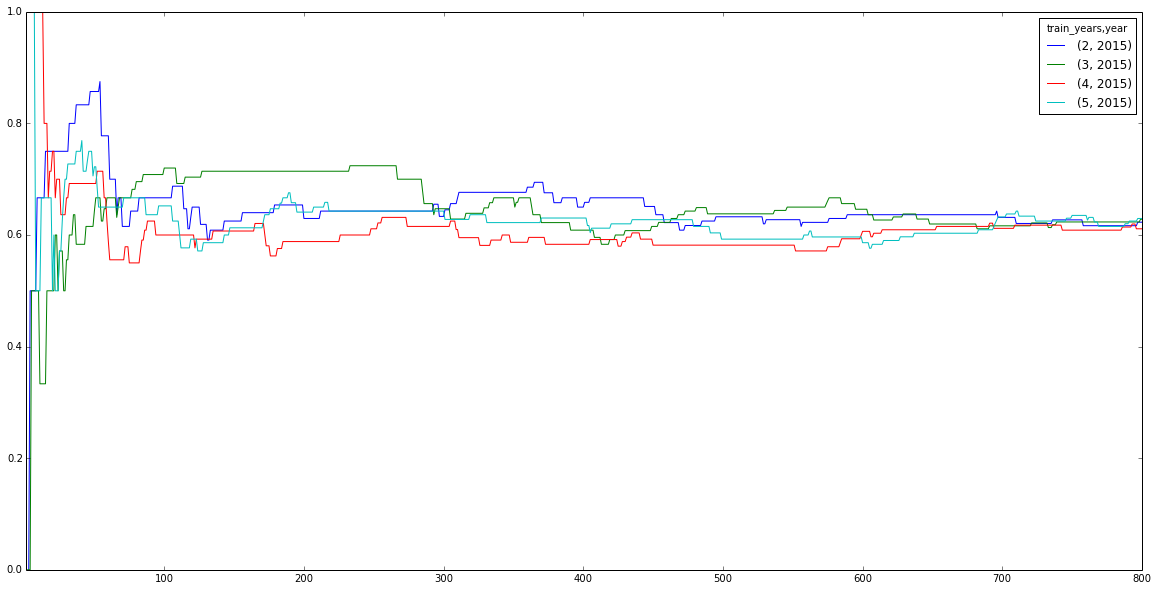

In [180]:
#explore.apply(df5.query('year == 2015'), model.precision_series, query="state=='NY'", k= 800, dropna=False).plot(figsize = (20,20))
explore.apply(df1.query('year == 2015'), model.precision_series, query="state=='NY'", k=800, dropna=False).plot(figsize = (20,10))

In [ ]:
original_data = violation_state_original_data() + violation_state_manifest_added() #+ violation_state_br_added() + violation_state_manifest_br_added()

epa.model.steps = reload(epa.model.steps)
steps = drain.step.load(original_data)
df2 = explore.to_dataframe(steps)
original_data[0].get_result()

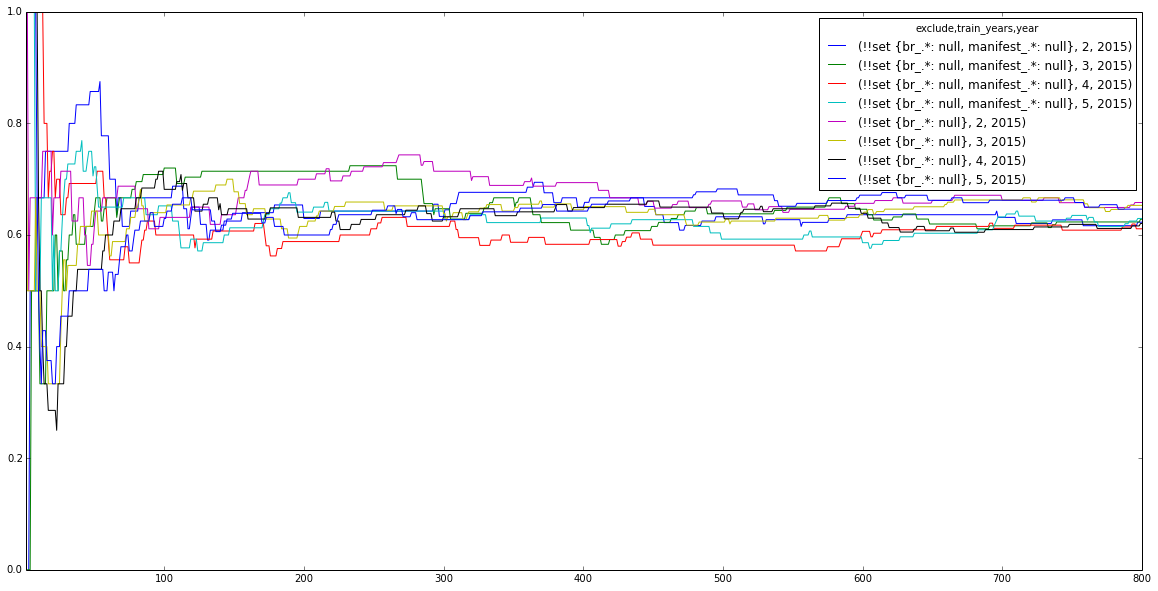

In [181]:
explore.apply(df2.query('year == 2015'), model.precision_series, query="state=='NY'", k=800, dropna=False).plot(figsize = (20,10))
#explore.apply(df5.query('year == 2015'), model.precision_series, query="state=='NY'", k= 800, dropna=False).plot(figsize = (20,20))

In [ ]:
original_data = violation_state_original_data() + violation_state_manifest_added() + violation_state_br_added() #+ violation_state_manifest_br_added()

epa.model.steps = reload(epa.model.steps)
steps = drain.step.load(original_data)
df3 = explore.to_dataframe(steps)
original_data[0].get_result()

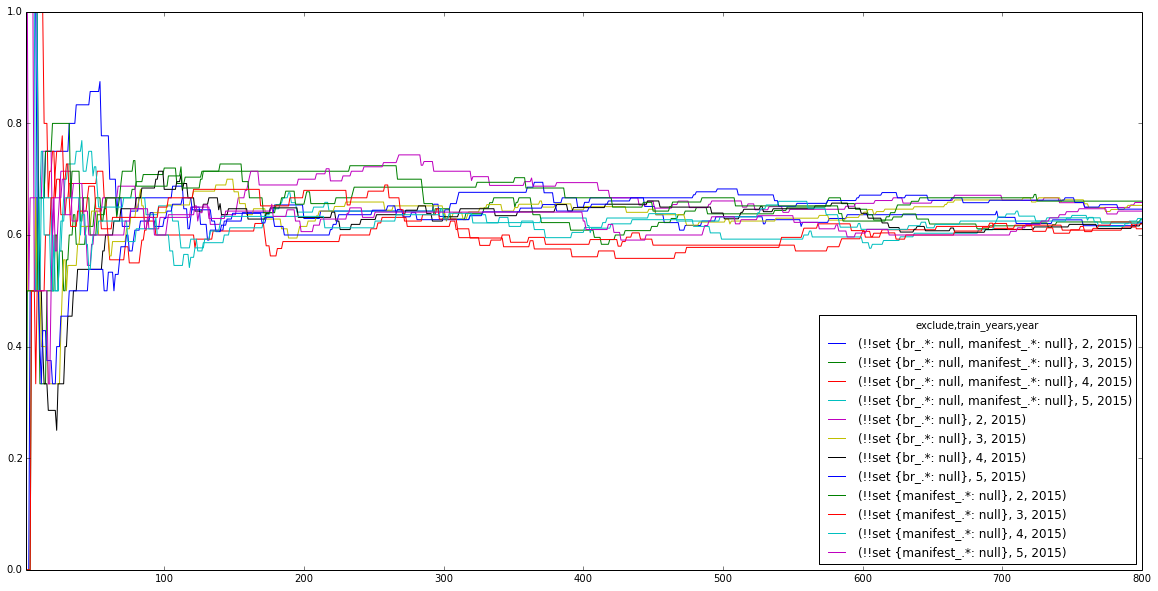

In [182]:
explore.apply(df3.query('year == 2015'), model.precision_series, query="state=='NY'", k=800,dropna=False).plot(figsize = (20,10))
#explore.apply(df5.query('year == 2015'), model.precision_series, query="state=='NY'", k= 800, dropna=False).plot(figsize = (20,20))

In [ ]:
original_data = violation_state_original_data() + violation_state_br_added() 

epa.model.steps = reload(epa.model.steps)
steps = drain.step.load(original_data)
df4 = explore.to_dataframe(steps)
original_data[0].get_result()

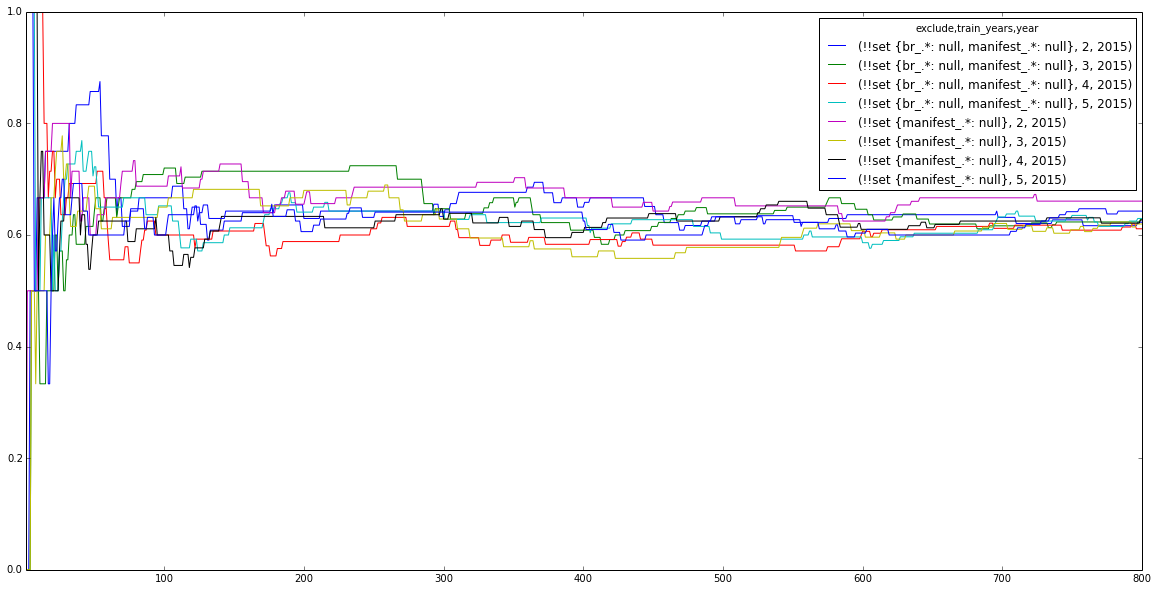

In [183]:
explore.apply(df4.query('year ==2015'), model.precision_series, query="state=='NY'", k=800,dropna=False).plot(figsize = (20,10))
#explore.apply(df5.query('year == 2015'), model.precision_series, query="state=='NY'", k= 800, dropna=False).plot(figsize = (20,20))

In [196]:
original_data[0]

FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
     criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
       handlers={}, icis={}, impute=True, include=set([]),
       inve...', region=None,
       rmp={}, train_query='aux.evaluation_state', train_years=2,
       year=2012)],
      prefit=False, return_estimator=False,
      return_feature_importances=True, return_predictions=True)

In [208]:
original_data = violation_state_original_data() + violation_state_manifest_br_added()

epa.model.steps = reload(epa.model.steps)
steps = drain.step.load(original_data)
df5 = explore.to_dataframe(steps)
original_data[0].get_result()

{'feature_importances':                                                feature  importance
 628             handlers_facility_all_receive_date_max    0.081890
 467              handlers_facility_5y_receive_date_max    0.027507
 42                                         handler_age    0.026938
 554             handlers_facility_all_handler_sqg_prop    0.016106
 385    investigations_facility_all_start_date_days_min    0.013785
 591  handlers_facility_all_handler_location_eq_mail...    0.013122
 331    investigations_facility_all_start_date_days_max    0.012806
 547                        handlers_facility_all_count    0.012200
 594            handlers_facility_all_handler_sqg_count    0.011710
 552   handlers_facility_all_handler_not_generator_prop    0.011557
 555           handlers_facility_all_handler_cesqg_prop    0.011260
 553             handlers_facility_all_handler_lqg_prop    0.011015
 546              handlers_facility_1y_receive_date_max    0.010406
 380  investigations_faci

In [191]:
original_data


[FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
        handlers={}, icis={}, impute=True, include=set([]),
        inve...', region=None,
        rmp={}, train_query='aux.evaluation_state', train_years=2,
        year=2012)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
        handlers={}, icis={}, impute=True, include=set([]),
        inve...', region=None,
        rmp={}, train_query='aux.evaluation_state', train_years=2,
        year=2013)],
       prefit=False, return_estimator=False,


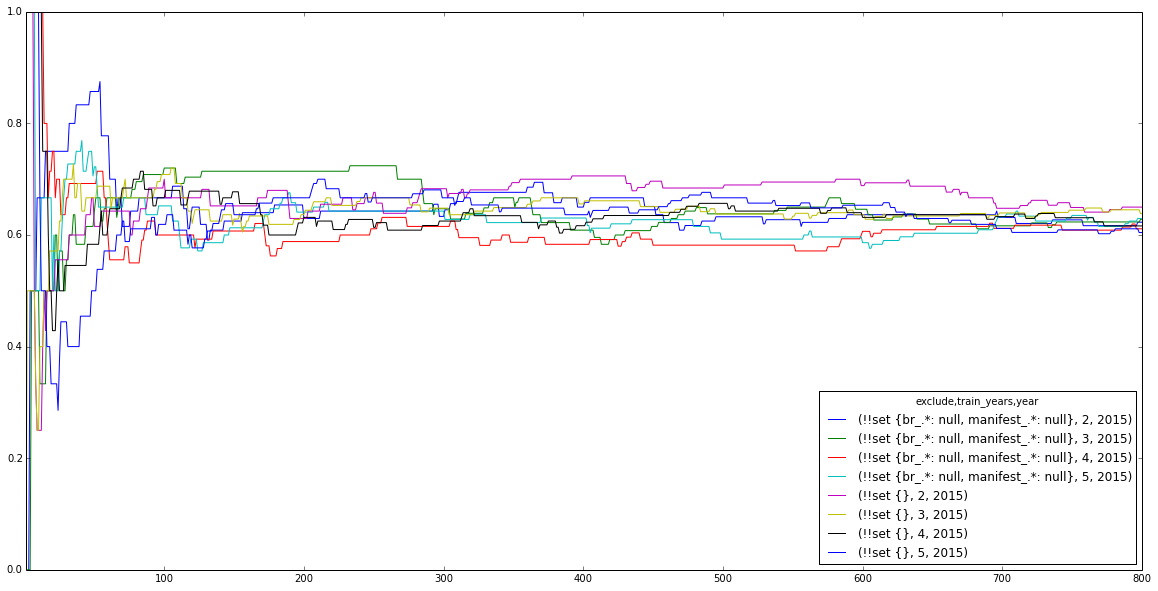

In [187]:
explore.apply(df5.query('year == 2015'), model.precision_series, query="state=='NY'", k= 800, dropna=False).plot(figsize = (20,10))

In [185]:
#original_data[0].get_result()

In [192]:
original_data

[FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
        handlers={}, icis={}, impute=True, include=set([]),
        inve...', region=None,
        rmp={}, train_query='aux.evaluation_state', train_years=2,
        year=2012)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
        handlers={}, icis={}, impute=True, include=set([]),
        inve...', region=None,
        rmp={}, train_query='aux.evaluation_state', train_years=2,
        year=2013)],
       prefit=False, return_estimator=False,


In [202]:
original_data[0]

FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
     criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
       handlers={}, icis={}, impute=True, include=set([]),
       inve...', region=None,
       rmp={}, train_query='aux.evaluation_state', train_years=2,
       year=2012)],
      prefit=False, return_estimator=False,
      return_feature_importances=True, return_predictions=True)

In [203]:
original_data[1]

FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
     criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
       handlers={}, icis={}, impute=True, include=set([]),
       inve...', region=None,
       rmp={}, train_query='aux.evaluation_state', train_years=2,
       year=2013)],
      prefit=False, return_estimator=False,
      return_feature_importances=True, return_predictions=True)

In [207]:
original_data[7] #3 train, test 2015

FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
     criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
       handlers={}, icis={}, impute=True, include=set([]),
       inve...', region=None,
       rmp={}, train_query='aux.evaluation_state', train_years=3,
       year=2015)],
      prefit=False, return_estimator=False,
      return_feature_importances=True, return_predictions=True)

In [211]:
original_data[11] #4 train, test 2015

FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
     criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
       handlers={}, icis={}, impute=True, include=set([]),
       inve...', region=None,
       rmp={}, train_query='aux.evaluation_state', train_years=4,
       year=2015)],
      prefit=False, return_estimator=False,
      return_feature_importances=True, return_predictions=True)

In [214]:
original_data[15] #5 train, test 2015

FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
     criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set(['manifest_.*', 'br_.*']),
       handlers={}, icis={}, impute=True, include=set([]),
       inve...', region=None,
       rmp={}, train_query='aux.evaluation_state', train_years=5,
       year=2015)],
      prefit=False, return_estimator=False,
      return_feature_importances=True, return_predictions=True)

In [219]:
explore.apply(df.query('year == 2013'), model.precision, query="state=='NY'", k= 800, dropna=False)

exclude                                 train_years  year
!!set {br_.*: null, manifest_.*: null}  2            2013    0.777778
                                        3            2013    0.720588
                                        4            2013    0.797101
                                        5            2013    0.791667
!!set {br_.*: null}                     2            2013    0.703704
                                        3            2013    0.753425
                                        4            2013    0.780822
                                        5            2013    0.783133
!!set {manifest_.*: null}               2            2013    0.750000
                                        3            2013    0.739130
                                        4            2013    0.772727
                                        5            2013    0.773333
!!set {}                                2            2013    0.689655
                                

In [220]:
explore.apply(df.query('year == 2015'), model.precision, query="state=='NY'", k= 800, dropna=False)

exclude                                 train_years  year
!!set {br_.*: null, manifest_.*: null}  2            2015    0.622951
                                        3            2015    0.628205
                                        4            2015    0.611111
                                        5            2015    0.629630
!!set {br_.*: null}                     2            2015    0.658228
                                        3            2015    0.653061
                                        4            2015    0.620690
                                        5            2015    0.646341
!!set {manifest_.*: null}               2            2015    0.660714
                                        3            2015    0.619718
                                        4            2015    0.626866
                                        5            2015    0.642857
!!set {}                                2            2015    0.650000
                                

In [221]:
#explore other logistic things

In [ ]:
violation_state_logistic()

test_data = violation_state_original_data() + violation_state_manifest_br_added()

epa.model.steps = reload(epa.model.steps)
steps = drain.step.load(original_data)
df5 = explore.to_dataframe(steps)
original_data[0].get_result()